# EDA: Digging into the Frequency and Severity of the dataset

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', None)

In [4]:
motor_df = pd.read_csv('../../data/input/exp/Motor_vehicle_insurance_data.csv', delimiter=";")
claims_df = pd.read_csv('../../data/input/exp/sample_type_claim.csv', delimiter=';')

### Claims Frequency Distribution - 2 methods documented

- Number: Categorical group for number of claims ranging from 0 to 25 (maximum number of claims made by 1 policyholder)
- Policies: Number of unique policies per group
- Claims: Total number of claims per group
- Proportion: Ratio of each group's policies to total number of policies.

#### Method 1 - Readable

In [5]:
def assign_claims_bin(claims_value):
    if claims_value <= 25:
        return str(claims_value)
    else:
        return '25+'

##### assign bin to each row of the motor_df
motor_df['claim_bin'] = motor_df['N_claims_year'].apply(assign_claims_bin)

#### Create a unique policy id to differentiate each policy/row in the dataset
motor_df['unique_policy_id'] = motor_df['ID'].astype(str) + motor_df['Date_last_renewal'].astype(str) + motor_df['Date_next_renewal'].astype(str)

In [7]:
grouping = (
    motor_df
    .groupby('claim_bin', observed=True)
    .agg({'unique_policy_id': 'nunique', 'N_claims_year': 'sum'})
    .rename(columns={'unique_policy_id': 'Policies', 'N_claims_year': 'Claims'})
    .sort_values(by=['claim_bin'], key=lambda x: x.astype(int), ascending=True) #using key to convert the values from string to int
    .reset_index()
    .rename(columns={'claims_bin': 'claim_group'})
)
##Calculate grouping proportion
grouping['Proportion'] = (grouping['Policies'] / grouping['Policies'].sum()).round(4)

## Summing and appending as a row
length_of_grouping = len(grouping)
grouping.loc[length_of_grouping] = ['Sum', grouping['Policies'].sum(), grouping['Claims'].sum(), grouping['Proportion'].sum()]

##Transpose df
grouping_transposed  = grouping.T

##clean out the columns
grouping_transposed.columns = [''] * len(grouping_transposed.columns)
grouping_transposed

,,,,,,,,,,,,,,,,,,,,,,,
claim_bin,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,21,25,Sum
Policies,85909,9539,4961,2435,1190,609,318,227,136,82,61,24,18,18,10,8,2,3,2,1,1,1,105555
Claims,0,9539,9922,7305,4760,3045,1908,1589,1088,738,610,264,216,234,140,120,32,51,36,19,21,25,41662
Proportion,0.8139,0.0904,0.047,0.0231,0.0113,0.0058,0.003,0.0022,0.0013,0.0008,0.0006,0.0002,0.0002,0.0002,0.0001,0.0001,0.0,0.0,0.0,0.0,0.0,0.0,1.0002


### Claims Severity Distribution - TBI

- Average severity (loss cost) made by each policyholder that initiated claims expressed in logarithimic scale
- Visual inspection and confirmation of numbers required

In [8]:
claims_summary  =  (
    claims_df[['Cost_claims_year']].drop_duplicates(keep='first') ### Sample df already aggregated the loss cost to each policyholder just need to drop duplicates
    .describe()
    .drop('count')
    .T
    .reset_index(drop=True)
)
claims_summary

,mean,std,min,25%,50%,75%,max
0,1041.265623,4930.436935,40.05,150.4,337.67,758.33,236285.18


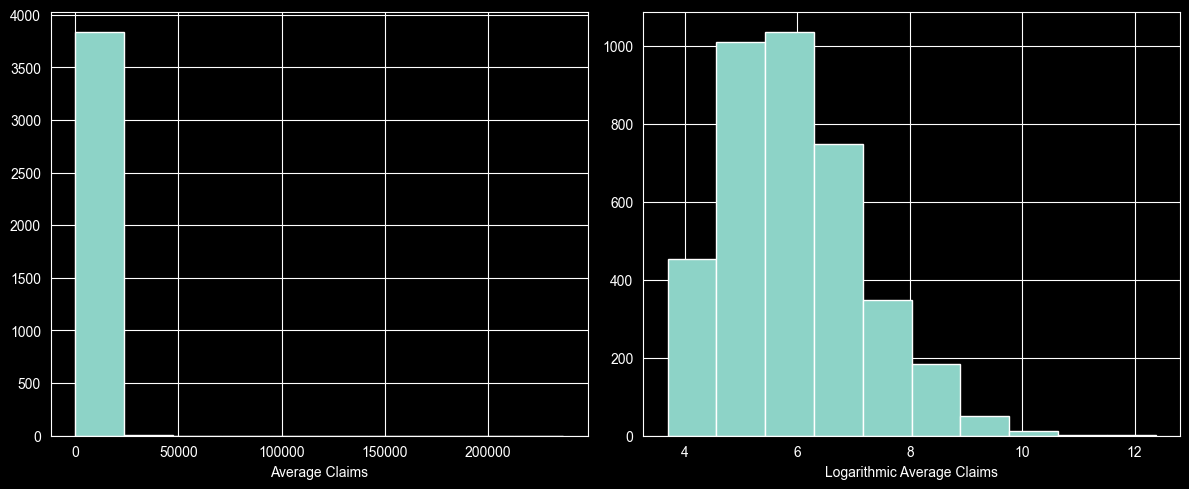

In [9]:
claims  = claims_df[['Cost_claims_year']].drop_duplicates(keep='first')
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

fig, ax1.hist(claims['Cost_claims_year'])
ax1.set_xlabel("Average Claims")
ax1.set_title("")

# Histogram of log(yAvg)
ax2.hist(np.log(claims['Cost_claims_year']))
ax2.set_xlabel("Logarithmic Average Claims")
ax2.set_title("")

plt.tight_layout()
plt.show()